In [1]:
import sys

import matplotlib.pyplot as plt
import networkx as nx
from loguru import logger

from pyeed import Pyeed
from pyeed.analysis.network_analysis import NetworkAnalysis
from pyeed.analysis.sequence_alignment import PairwiseAligner

logger.remove()
level = logger.add(sys.stderr, level="WARNING")

In [2]:
uri = "bolt://127.0.0.1:7688"
user = "neo4j"
password = "12345678"

eedb = Pyeed(uri, user=user, password=password)

Pyeed Graph Object Mapping constraints not defined. Use _install_labels() to set up model constraints.
📡 Connected to database.


In [5]:
# load NCBI accession ids from a file
ids = []
with open("ids.txt", "r") as f:
    for line in f:
        ids.append(line.strip())


# now fecth all of the proteins from the database
eedb.fetch_from_primary_db(ids, db="ncbi_protein")

In [7]:
# perform the sequence alignment
pa = PairwiseAligner()
alignments = pa.align_multipairwise(ids=ids, db=eedb.db)

Output()

In [8]:
attribute = "similarity"
scale = 1
threshold = 0.15
mode = "HIDE_UNDER_THRESHOLD"
type_relationship = "PAIRWISE_ALIGNED"

In [11]:
na = NetworkAnalysis(db=eedb.db)
network = na.create_graph(ids=ids, nodes=["Protein"])

In [12]:
filtered_graph, pos = na.calculate_positions_2d(
    attribute=attribute,
    scale=scale,
    threshold=threshold,
    mode=mode,
    type_relationship=type_relationship,
)

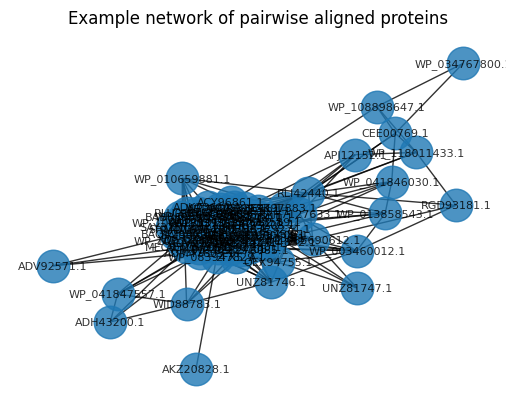

In [16]:
node_labels = {
    n: data["properties"].get("accession_id", n)
    for n, data in filtered_graph.nodes(data=True)
}

edge_weights = nx.get_edge_attributes(filtered_graph, attribute) if attribute else {}


# Draw edge labels if attribute is provided
if attribute:
    nx.draw_networkx_edge_labels(filtered_graph, pos, edge_labels=edge_weights)

nx.draw(
    filtered_graph,
    pos,
    with_labels=True,
    node_size=550,
    alpha=0.8,
    font_size=8,
    edge_color="black",
    labels=node_labels,
)

plt.title("Example network of pairwise aligned proteins")

plt.show()